<h1><center>Foundation of Machine Learning</center></h1>
<h2>
<hr style=" border:none; height:3px;">
<center>Project : Spotify Recommender</center>
<hr style=" border:none; height:3px;">
</h2>

### Imports

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import sklearn 
from sklearn import model_selection
import Recommenders
import Evaluation
import random as rd

# Prepare the Dataset

In [45]:
# Read the data
df = pd.read_csv('final.csv', index_col=0)

#Merge song title and artist_name columns to make a merged column
df['song'] = df['title'].map(str) + " - " + df['artist_name']   
#Drop unneccesary columns
df.drop(['title', 'artist_name'], axis=1, inplace=True)

In [46]:
# Minimal number of songs a user must have listened to be kept in our dataset
min_songs = 10
# Minimal number of times a song must have been listened to be kept in our dataset
min_listenings = 20

In [47]:
# Count how many songs each user listened to
df['user_n_songs'] = df.groupby('user_id')['song'].transform('count')

# Count how many users listened to each song
df['song_n_users'] = df.groupby('song')['user_id'].transform('count')

# Keep all the users that listened to at least n songs
df = df[df['user_n_songs'] >= min_songs].drop_duplicates()

# Keep only the songs that were listened by at least 10 users
df = df[df['song_n_users'] >= min_listenings].drop_duplicates()

In [56]:
user_ids = df[['user_id']].drop_duplicates()
df_test = df[['song', 'user_id', 'play_count']].reset_index(drop=True)
df_test = df_test[['song', 'user_id', 'play_count']].sample(frac=1).reset_index(drop=True)

df_test.head()

,song,user_id,play_count
0,Fake Tales Of San Francisco - Arctic Monkeys,fee44320980fd1353edf22c492e99d3e6faec939,2
1,Lively Up Yourself - Bob Marley,277f6bdee05a8bd0a2a58c4c107d35c4920956a7,2
2,Don't Let Go - Weezer,75b27d8e62bbff7a42a7ba2e11470442d66b4b82,1
3,The World Turned Upside Down - Coldplay,b2839e64dbc7416c1fb9a8daf9a271a0f3b23f32,1
4,November Has Come - Gorillaz,f392f43ff32a4ba8b1c04fdb9c310c53a234abf9,1


# Recommenders

In this part, we will create, test and evaluate different model to give recommendations. The different recommender can be found in the file `Recommenders.py`, and the functions to evaluate the recommenders can be found in `Evaluation.py`.

In [57]:
user = df_test.user_id.unique()
i = rd.randint(0, len(user))

user_id = user[i]

In [58]:
seed = 123
sample_fraction = 0.7

train_data = df_test.groupby('user_id', as_index=False)
train_data = train_data.apply(lambda user_songs: user_songs.sample(frac=sample_fraction, random_state=seed))


evaluation = Evaluation.Evaluation(user_ids, df_test, seed)

## Simple Recommender based on Popularity

This simple model recommends songs to users based only on their popularity. This is a first naive approach as it is not a personalized recommendation: all users will get the same recommendations.

In [59]:
reco_pop = Recommenders.PopularityRecommender(train_data)

# Example with user ca055b9072e5a68d89f42099869213404f56a981
reco_pop.recommend(user_id, 10)[0]

,song,score,rank_pop
998,Supermassive Black Hole (Album Version) - Muse,352,1.0
163,Check On It - Beyoncé feat. Slim Thug,344,2.0
266,Don't Panic - Coldplay,321,3.0
77,Baby Boy [feat. Beyonce] - Sean Paul,286,4.0
763,One I Love - Coldplay,270,5.0
13,A Dustland Fairytale - The Killers,261,6.0
835,Ragoo - Kings Of Leon,245,7.0
741,Nothin' On You [feat. Bruno Mars] (Album Version) - B.o.B,228,8.0
54,Angie (1993 Digital Remaster) - The Rolling Stones,227,9.0
200,Crawling (Album Version) - Linkin Park,219,10.0


### Evaluation of the model

Accuracy of    the first suggestion  :    22.60% (0.20007774425804925, 0.25192225574195076)
Accuracy of the  5 first suggestions :    21.08% (0.19949444387292414, 0.22210555612707583)
Accuracy of the 10 first suggestions :    18.13% (0.173748914491228, 0.18885108550877197)
Accuracy of the 20 first suggestions :    15.40% (0.14904693331112376, 0.15905306668887623)


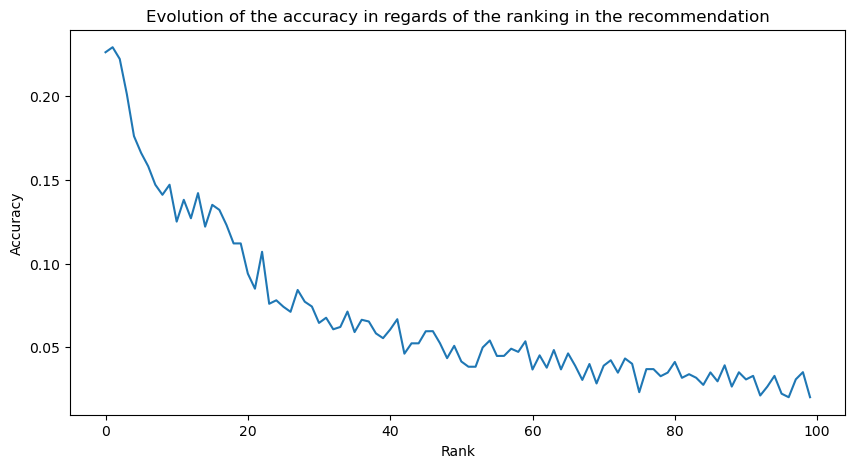

In [60]:
evaluation.evaluate(reco_pop.recommend, 1000)

## Recommender based on Item Similarity

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [61]:
reco_sim = Recommenders.ItemSimilarityRecommender(train_data)

# Example with user ca055b9072e5a68d89f42099869213404f56a981
reco_sim.recommend('ca055b9072e5a68d89f42099869213404f56a981', 10)[0]

,song,score,rank_sim
0,You (featuring Tank) (Amended Album Version) - Plies featuring Tank,0.122455,1
1,One I Love - Coldplay,0.116408,2
2,Baby Boy [feat. Beyonce] - Sean Paul,0.114070,3
3,Genius - Kings Of Leon,0.108157,4
4,Ragoo - Kings Of Leon,0.105719,5
5,Good Girl Gone Bad - Rihanna,0.100875,6
6,Be With You - Beyoncé,0.089042,7
7,Music Of The Sun - Rihanna,0.086142,8
8,Street Lights - Kanye West,0.080576,9
9,The World Turned Upside Down - Coldplay,0.076096,10


### Evaluation of the model

Accuracy of    the first suggestion  :    25.00% (0.1651310699442871, 0.3348689300557129)
Accuracy of the  5 first suggestions :    16.03% (0.12812854354703707, 0.19251273901809318)
Accuracy of the 10 first suggestions :    10.95% (0.09003987735678318, 0.12902705976289228)
Accuracy of the 20 first suggestions :    7.47% (0.06295425268059103, 0.08642334068040482)


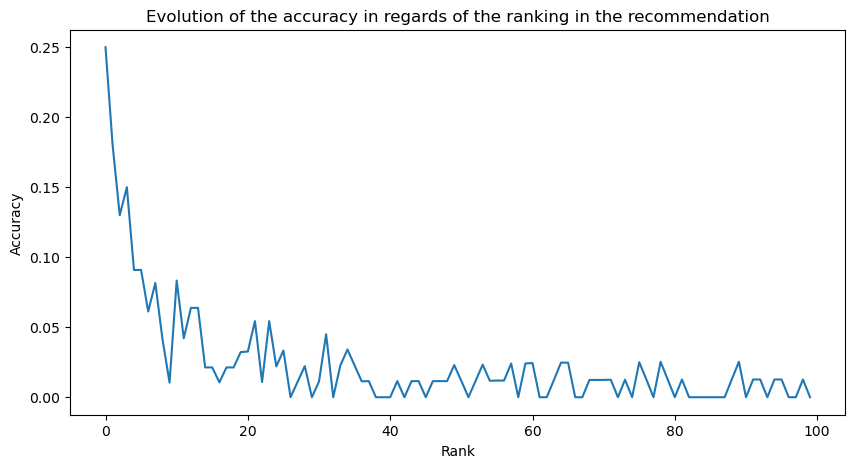

In [62]:
evaluation.evaluate(reco_sim.recommend, 100)

## Recommender based on Play Count

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO.

It is now important to create another model based on play_count and not only on rather the user has listened to the music or not. Let's try to call our system based on ratings.

In [63]:
reco_play = Recommenders.PlayCountRecommender(train_data)

# Example with user ca055b9072e5a68d89f42099869213404f56a981
reco_play.recommend('ca055b9072e5a68d89f42099869213404f56a981', 10)[0]

,song,score,rank_play_count
0,You (featuring Tank) (Amended Album Version) - Plies featuring Tank,3.730872,1
1,Baby Boy [feat. Beyonce] - Sean Paul,3.644642,2
2,Genius - Kings Of Leon,3.357527,3
3,Music Of The Sun - Rihanna,2.725757,4
4,Good Girl Gone Bad - Rihanna,2.574747,5
5,One I Love - Coldplay,2.505029,6
6,Street Lights - Kanye West,2.354431,7
7,The World Turned Upside Down - Coldplay,2.353355,8
8,Let Me Out - Maximilian Hecker,2.347999,9
9,Ragoo - Kings Of Leon,2.062940,10


### Evaluation of the model

Accuracy of    the first suggestion  :    13.00% (0.06408573806675026, 0.19591426193324973)
Accuracy of the  5 first suggestions :    10.42% (0.0774011395848612, 0.13101569408247346)
Accuracy of the 10 first suggestions :    8.50% (0.06762876328560635, 0.10241172254435316)
Accuracy of the 20 first suggestions :    5.77% (0.04735326725947919, 0.06811065026629401)


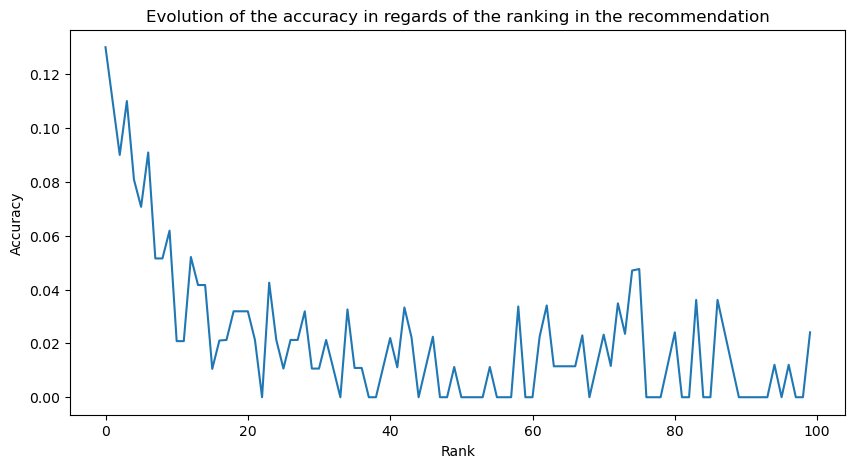

In [66]:
evaluation.evaluate(reco_play.recommend, 100)

## Recommender combined

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO.

It is now important to create another model based on play_count and not only on rather the user has listened to the music or not. Let's try to call our system based on ratings.

In [67]:
# Create a lsit of different weights combinations of the recommenders
weights = [[0.5, 0.5, 0.0], [0.5, 0.0, 0.5], [0.0, 0.5, 0.5], [0.3, 0.3, 0.4], [0.3, 0.4, 0.3], [0.4, 0.3, 0.3], [0.2, 0.2, 0.6], [0.2, 0.6, 0.2], [0.6, 0.2, 0.2], [0.1, 0.1, 0.8], [0.1, 0.8, 0.1], [0.8, 0.1, 0.1]]


class MixingRecommenders:
    def __init__(self, df, weights):
        self.df = df
        self.weights = weights
        self.pop = Recommenders.PopularityRecommender(df)
        self.item_sim = Recommenders.ItemSimilarityRecommender(df)
        self.reco = Recommenders.PlayCountRecommender(df)
    
    def get_user_songs(self, user_id):
        """
        Return a pandas DataFrame that contains the unique items (songs) corresponding to a given user
        """

        user_songs = self.df[self.df['user_id'] == user_id]
        user_songs = user_songs.sort_values(by='play_count', ascending=False)
        return user_songs
        
    def recommend(self, user_id, nb_of_recommendations):
        all_scores1 = self.pop.recommend(user_id, 10)[2].copy()
        all_scores2 = self.item_sim.recommend(user_id, 10)[2].copy()
        all_scores3 = self.reco.recommend(user_id, 10)[2].copy()

        # Normalize the scores between 0 and 1
        all_scores1['score_pop'] = (all_scores1['score'] - all_scores1['score'].min())/(all_scores1['score'].max() - all_scores1['score'].min())
        all_scores2['score_sim'] = (all_scores2['score'] - all_scores2['score'].min())/(all_scores2['score'].max() - all_scores2['score'].min())
        all_scores3['score_play_count'] = (all_scores3['score'] - all_scores3['score'].min())/(all_scores3['score'].max() - all_scores3['score'].min())
        all_scores1.drop('score', axis=1, inplace=True)
        all_scores2.drop('score', axis=1, inplace=True)
        all_scores3.drop('score', axis=1, inplace=True)


        # Merge the three tables on song and sum the scores
        all_scores = pd.merge(all_scores1, all_scores2, on='song', how='outer')
        all_scores = pd.merge(all_scores, all_scores3, on='song', how='outer')
        all_scores = all_scores.fillna(0)
        all_scores['score'] = all_scores['score_pop']* self.weights[0] + all_scores['score_sim']* self.weights[1] + all_scores['score_play_count']* self.weights[2]

        # Sort the songs by score and return the top 10
        all_scores = all_scores.sort_values('score', ascending=False)
        top10 = all_scores.iloc[:nb_of_recommendations, :]
        return top10, set(self.get_user_songs(user_id)['song']), all_scores

    

user = df_test.user_id.unique()
i = rd.randint(0, len(user))

user_id = user[i]

mix = MixingRecommenders(train_data, weights[4])

mix.recommend(user_id, 10)[0]


# User with a great union between sim and play count scores ca055b9072e5a68d89f42099869213404f56a981

,song,rank_pop,score_pop,rank_sim,score_sim,rank_play_count,score_play_count,score
1,Check On It - Beyoncé feat. Slim Thug,2.0,0.293162,5.0,0.314626,24.0,0.127464,0.735253
6,Ragoo - Kings Of Leon,7.0,0.208547,4.0,0.324806,25.0,0.127390,0.660743
56,Streets On Fire (Explicit Album Version) - Lupe Fiasco,57.0,0.056410,2.0,0.395698,7.0,0.207329,0.659437
10,You (featuring Tank) (Amended Album Version) - Plies featuring Tank,11.0,0.178632,3.0,0.327387,14.0,0.150624,0.656643
4,One I Love - Coldplay,5.0,0.229915,6.0,0.299648,32.0,0.103688,0.633250
3,Baby Boy [feat. Beyonce] - Sean Paul,4.0,0.243590,9.0,0.278950,36.0,0.097548,0.620088
2,Don't Panic - Coldplay,3.0,0.273504,22.0,0.228221,31.0,0.104674,0.606400
14,I Am The Club (Explicit Album Version) - Plies,15.0,0.167521,8.0,0.286130,17.0,0.137568,0.591219
5,A Dustland Fairytale - The Killers,6.0,0.222222,10.0,0.276311,53.0,0.078982,0.577515
117,The Devil - The Rapture,118.0,0.029060,1.0,0.400000,16.0,0.144099,0.573159


Accuracy of    the first suggestion  :    26.00% (0.13841902475292034, 0.3815809752470797)
Accuracy of the  5 first suggestions :    13.20% (0.09004102070641612, 0.1739589792935839)
Accuracy of the 10 first suggestions :    9.82% (0.0720867115626974, 0.12430607400844489)
Accuracy of the 20 first suggestions :    6.23% (0.04716727750408775, 0.07744967857354249)


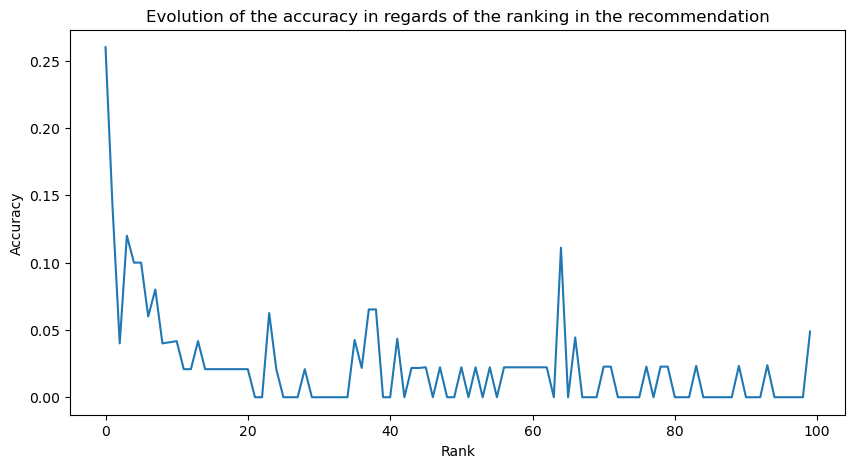

In [68]:
evaluation.evaluate(mix.recommend, 50)

Accuracy of    the first suggestion  :    10.00% (0.0, 0.2859385096913685)
Accuracy of the  5 first suggestions :    10.00% (0.01684577053901931, 0.1831542294609807)
Accuracy of the 10 first suggestions :    8.00% (0.026827510007233275, 0.13317248999276673)
Accuracy of the 20 first suggestions :    4.50% (0.01626964211680177, 0.07373035788319823)
Accuracy of    the first suggestion  :    0.00% (0.0, 0.0)
Accuracy of the  5 first suggestions :    8.00% (0.004802743507081625, 0.15519725649291838)
Accuracy of the 10 first suggestions :    5.00% (0.007283575292052945, 0.09271642470794705)
Accuracy of the 20 first suggestions :    5.00% (0.019794926420966048, 0.08020507357903396)
Accuracy of    the first suggestion  :    30.00% (0.015974234910674567, 0.5840257650893255)
Accuracy of the  5 first suggestions :    12.00% (0.029926912846810913, 0.21007308715318906)
Accuracy of the 10 first suggestions :    10.00% (0.04120108046379837, 0.15879891953620165)
Accuracy of the 20 first suggestions : 

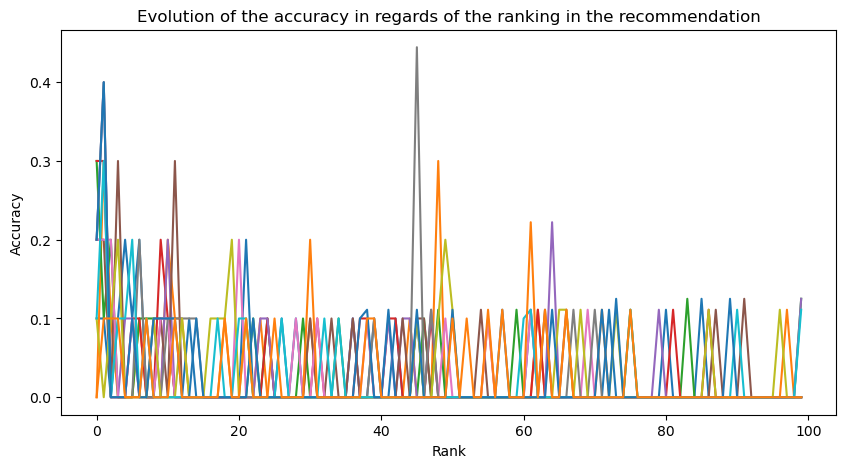

In [70]:
for i in range(len(weights)):
    mix = MixingRecommenders(train_data, weights[i])
    evaluation.evaluate(mix.recommend, 10)